In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def get_intersections(x0, y0, r0, x1, y1, r1, dist):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=dist

    
    # non intersecting
    if d > (r0 + r1):
        return None
    # One circle within other
    #if d < abs(r0-r1):
    #    return None
    # coincident circles
    #if d == 0 and r0 == r1:
    #    return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return (x3, y3, x4, y4)

In [84]:
def avoid_col_mult(pos, vel_self, vel, front_idx):
    dt = 0.02
    ang = math.atan2(vel_self[1], vel_self[0])
    ang = math.fmod(ang, 2 * math.pi)
    ang = math.fmod(2*math.pi+ang, 2 * math.pi)
    
    nFront = len(front_idx)
    
    pos_other = np.zeros((2,nFront))
    
    for i in range(nFront):
        
        pos_other[:,i] = np.array(pos[front_idx[i]]) + np.array(vel[front_idx[i]])*dt

    pos_self = np.array([0,0])
    #print(pos_other)

    col = True

    pos_new = [0,0]
    for step in np.linspace(dt, 4, int(4/dt)):
        if step > dt*2:
            print(step)
        for angle in np.linspace(0,4*math.pi, 20):
            
            sucAvoid = 0
            ang_add = ang+angle
            ang_red = ang-angle

            pos_new[0] = np.cos(ang_add)*step
            pos_new[1] = np.sin(ang_add)*step
            
            #print(pos_new/np.linalg.norm(pos_new))
            
            for i in range(nFront):
                dist = np.linalg.norm(np.array(pos_new)-np.array(pos_other[:,i]))
                #print(i,dist)

                if dist >= 0.5:
                    sucAvoid += 1
                    #print(sucAvoid)
            if sucAvoid >= nFront:
                
                pos_new = np.array(pos_new)/step
                #print(vel_self,ang, angle)
                #print(pos_new, pos_other[:,0], vel[front_idx[0]])
                
                return(pos_new)
            
            sucAvoid = 0
            pos_new[0] = np.cos(ang_red)*step
            pos_new[1] = np.sin(ang_red)*step
            
            #print(pos_new/np.linalg.norm(pos_new))

            for i in range(nFront):
                dist = np.linalg.norm(np.array(pos_new)-np.array(pos_other[:,i]))
                #print(i,dist)

                if dist >= 0.5:
                    sucAvoid += 1
                    
                    
            if sucAvoid >= nFront:
                
                pos_new = np.array(pos_new)/step
                #print(vel_self,ang, angle)
                #print(pos_new, pos_other[:,0], vel[front_idx[0]])
                
                
                return(pos_new)


In [4]:
def col2(pos_col, vel_col, vel_self, dist):

    fstrength = 0
    preySize = 2*0.25
    pos_pred = pos_col
    vel_pred = vel_col
    dist_pred = dist
    command_flee = np.zeros(2)
    command_flee_pred = command_flee
    col_pos = [0,0]
    
    
    


    col = False
    #distance regulation = repulsion + attraction
    if (abs(dist_pred) < preySize):
        
        
        
        
        col_pos_all = get_intersections(0, 0, preySize/2, pos_pred[0], pos_pred[1], preySize/2, dist)
        #print(col_pos_all[2])
        col_pos[0] = (col_pos_all[0]+col_pos_all[2])/2
        col_pos[1] = (col_pos_all[1]+col_pos_all[3])/2
        #print(col_pos)
        #print("dist", dist)

        front_self = np.array(vel_self)*0.25
        front_other = np.array(pos_col)+np.array(vel_col)*0.25
        print("colposall", col_pos_all)
        print("self", front_self, "other", front_other, "col", col_pos)
        dist_col_self = np.linalg.norm([front_self[0]-col_pos[0],front_self[1]-col_pos[1]])
        dist_col_other = np.linalg.norm([front_other[0]-col_pos[0],front_other[1]-col_pos[1]])
        #print(dist_col_self, dist_col_other)
        
        #phi_self = np.arctan2(vel_self[1],vel_self[0])
        #phi_other = np.arctan2(vel_col[1],vel_col[0])
        
        #phi_self_col = np.arctan2(col_pos[1],col_pos[0])
        #phi_other_col = np.arctan2(col_pos[1]-pos_col[1],col_pos[0]-pos_col[0])
        
        
        
        if abs(dist_col_self) < abs(dist_col_other):
            command_flee = vel_self*0
            col = "front"
            
        else:
            command_flee = vel_col
            col = "back"
            

        fstrength = 1000 * (dist_pred - preySize)
        

        
    return ( command_flee_pred * fstrength), col, col_pos

In [5]:
pos_pred = [0.3,0.3]
dist = np.linalg.norm(pos_pred)
vel_col = [-1,0]
vel_self = [-1,0]
a, b, col_pos = col2(pos_pred, vel_col, vel_self, dist)
print(b)


colposall (0.24354143466934852, 0.05645856533065145, 0.05645856533065145, 0.24354143466934852)
self [-0.25  0.  ] other [0.05 0.3 ] col [0.15, 0.15]
back


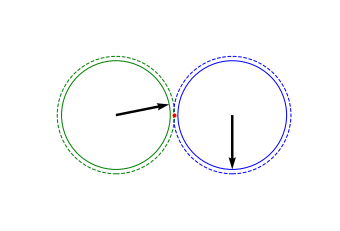

In [56]:
# intersection circles
x0, y0 = 0, 0
r0 = 0.25
x1, y1 = 0.535, 0
r1 = 0.25



# intersecting with (x1, y1) but not with (x0, y0)
x2, y2 = -1,0
r2 = 2.5

circle1 = plt.Circle((x0, y0), r0, color='g', fill=False)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False)

circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')



fig, ax = plt.subplots() 
ax.set_xlim((-0.5, 1))
ax.set_ylim((-0.5, 0.5))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle11)
ax.add_artist(circle22)


intersections = get_intersections(x0, y0, r0+0.02, x1, y1, r1+0.02, np.linalg.norm([x1,y1]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
#if intersections is not None:
    #i_x3, i_y3, i_x4, i_y4 = intersections 
    #plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

v2 = [1, 0.2]
v2 /= np.linalg.norm(v2)  
    
plt.quiver(x1,y2,0,-1, angles='xy', scale_units='xy', scale=4)
plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4)
plt.plot(col_pos[0], col_pos[1], '.', color='r')
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')

[0.05060329 0.99871883]


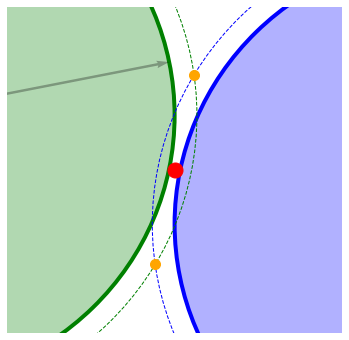

In [208]:
# intersection circles
x0, y0 = 0, 0
r0 = 0.25
x1, y1 = 0.5, -0.1
r1 = 0.25



# intersecting with (x1, y1) but not with (x0, y0)
x2, y2 = -1,0
r2 = 2.5

circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4)


circle3 = plt.Circle((x0, y0), r0, color='g', fill=True, linewidth = 1, alpha = 0.3)
circle4 = plt.Circle((x1, y1), r1, color='b', fill=True, linewidth = 1, alpha = 0.3)

circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')



fig, ax = plt.subplots() 
ax.set_xlim((0.1,0.4))
ax.set_ylim((-0.2, 0.1))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle11)
ax.add_artist(circle22)

intersections = get_intersections(x0, y0, r0+0.02, x1, y1, r1+0.02, np.linalg.norm([x1,y1]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)

v2 = [1, 0.2]
v2 /= np.linalg.norm(v2)  
v1 = [-0.3,-1]
v1 /= np.linalg.norm(v1)

pos_other = [x1, y1]
pos_new = avoid_col_mult([pos_other], v2, v1, [0])
#pos_new = avoid_col(pos_other, v2)/0.06
pos_new /= np.linalg.norm(pos_new)
#pos_new = [0.02286064, 0.99973866]
print(pos_new)



plt.quiver(x1,y1,v1[0],v1[1], angles='xy', scale_units='xy', scale=4)
plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4, alpha=0.3)
plt.quiver(x0,y0,pos_new[0],pos_new[1], angles='xy', scale_units='xy', scale=4)
plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
plt.axis('off')
#plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(6,6)#plt.show()
plt.savefig("circles3_close.pdf")

[0.05060329 0.99871883]


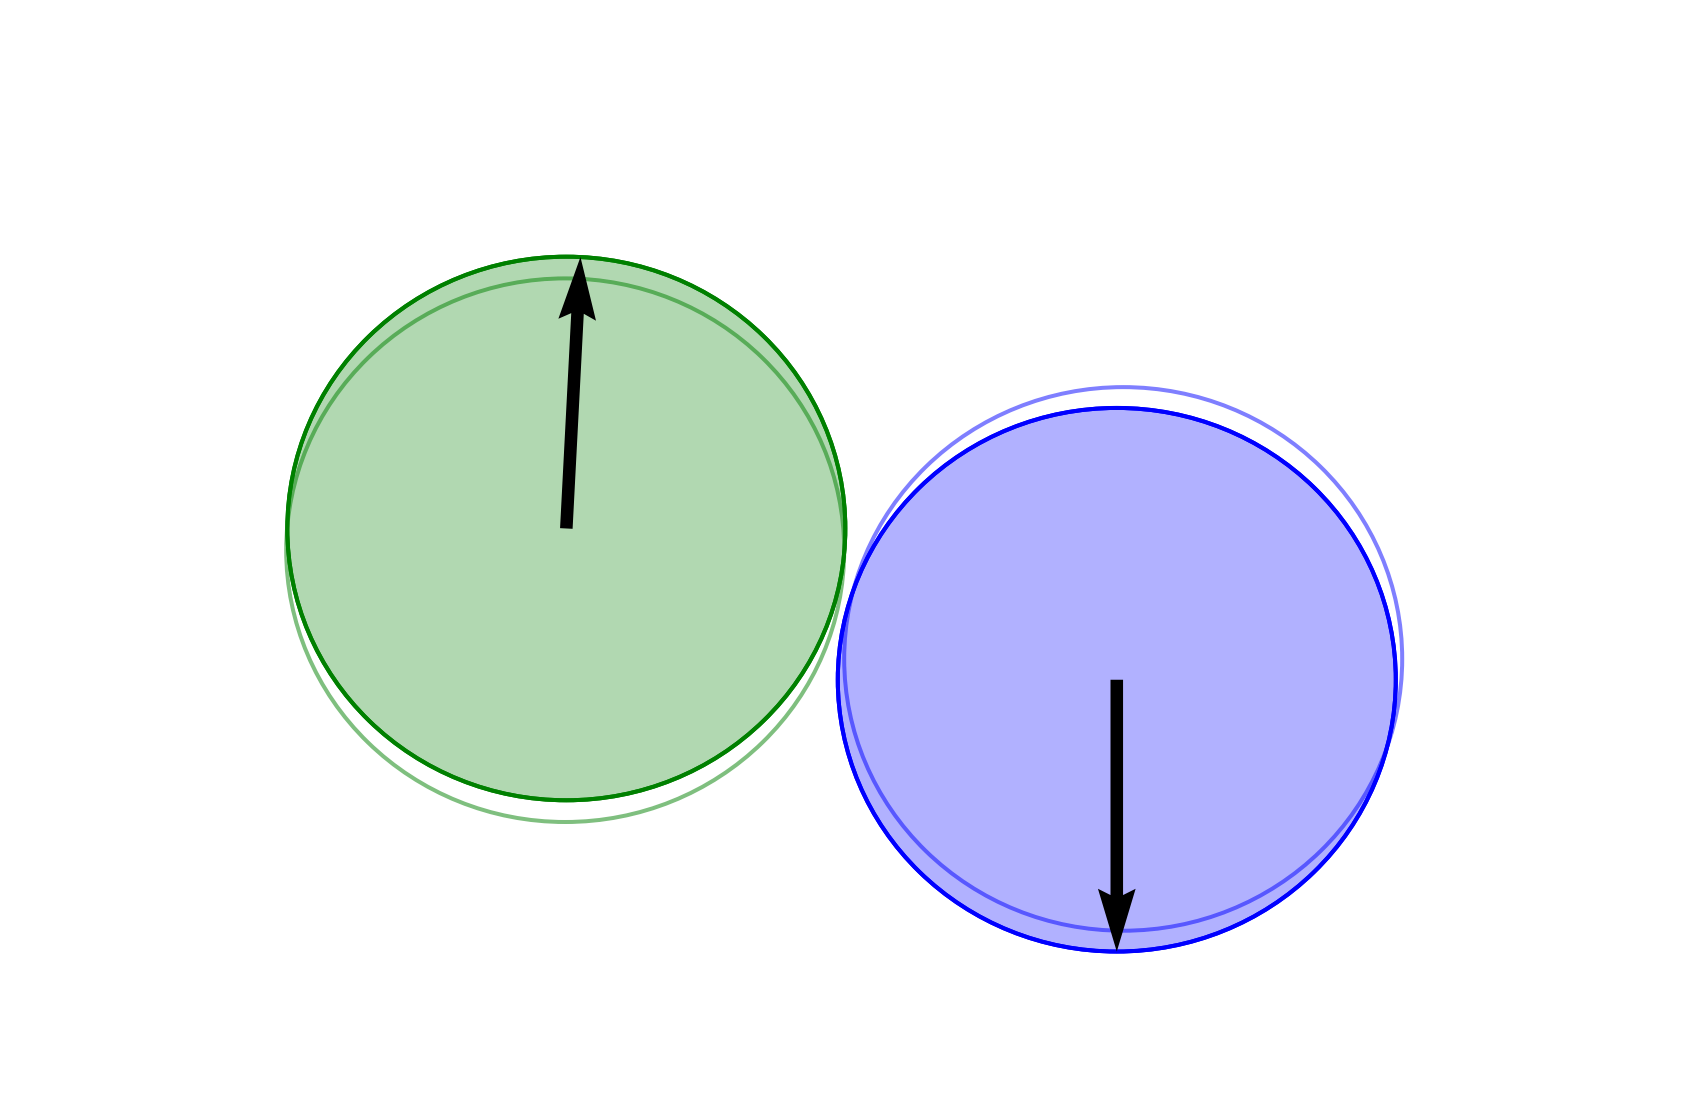

In [165]:
fig, ax = plt.subplots() 
ax.set_xlim((-0.5, 1))
ax.set_ylim((-0.5, 0.5))




circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4, alpha=0.5)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4, alpha=0.5)

ax.add_artist(circle1)
ax.add_artist(circle2)


x0 += pos_new[0]*0.02
y0 += pos_new[1]*0.02

x1 += v1[0]*0.02
y1 += v1[1]*0.02

circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4)
circle3 = plt.Circle((x0, y0), r0, color='g', fill=True, linewidth = 1, alpha = 0.3)
circle4 = plt.Circle((x1, y1), r1, color='b', fill=True, linewidth = 1, alpha = 0.3)

circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')


ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)


#circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
#circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')

ax.add_artist(circle1)
ax.add_artist(circle2)
#ax.add_artist(circle11)
#ax.add_artist(circle22)


intersections = get_intersections(x0, y0, r0+0.02, x1, y1, r1+0.02, np.linalg.norm([x1,y1]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    #plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)

v2 = [1, 0.2]
v2 /= np.linalg.norm(v2)  
#v1 = [0.3,-1]

pos_other = [x1, y1]
pos_new = avoid_col_mult([pos_other], v2, v1, [0])
#pos_new = avoid_col(pos_other, v2)/0.06
pos_new /= np.linalg.norm(pos_new)
#pos_new = [0.02286064, 0.99973866]
print(pos_new)



plt.quiver(x1,y1,0,-1, angles='xy', scale_units='xy', scale=4)
#plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4, alpha=0.3)
plt.quiver(x0,y0,pos_new[0],pos_new[1], angles='xy', scale_units='xy', scale=4)
#plt.plot(col_pos[0], col_pos[1], '.', color='r')
plt.axis('off')
plt.gcf().set_size_inches(30,20)
plt.savefig("circles1-2.png")

[-0.21429685 -0.97676858]


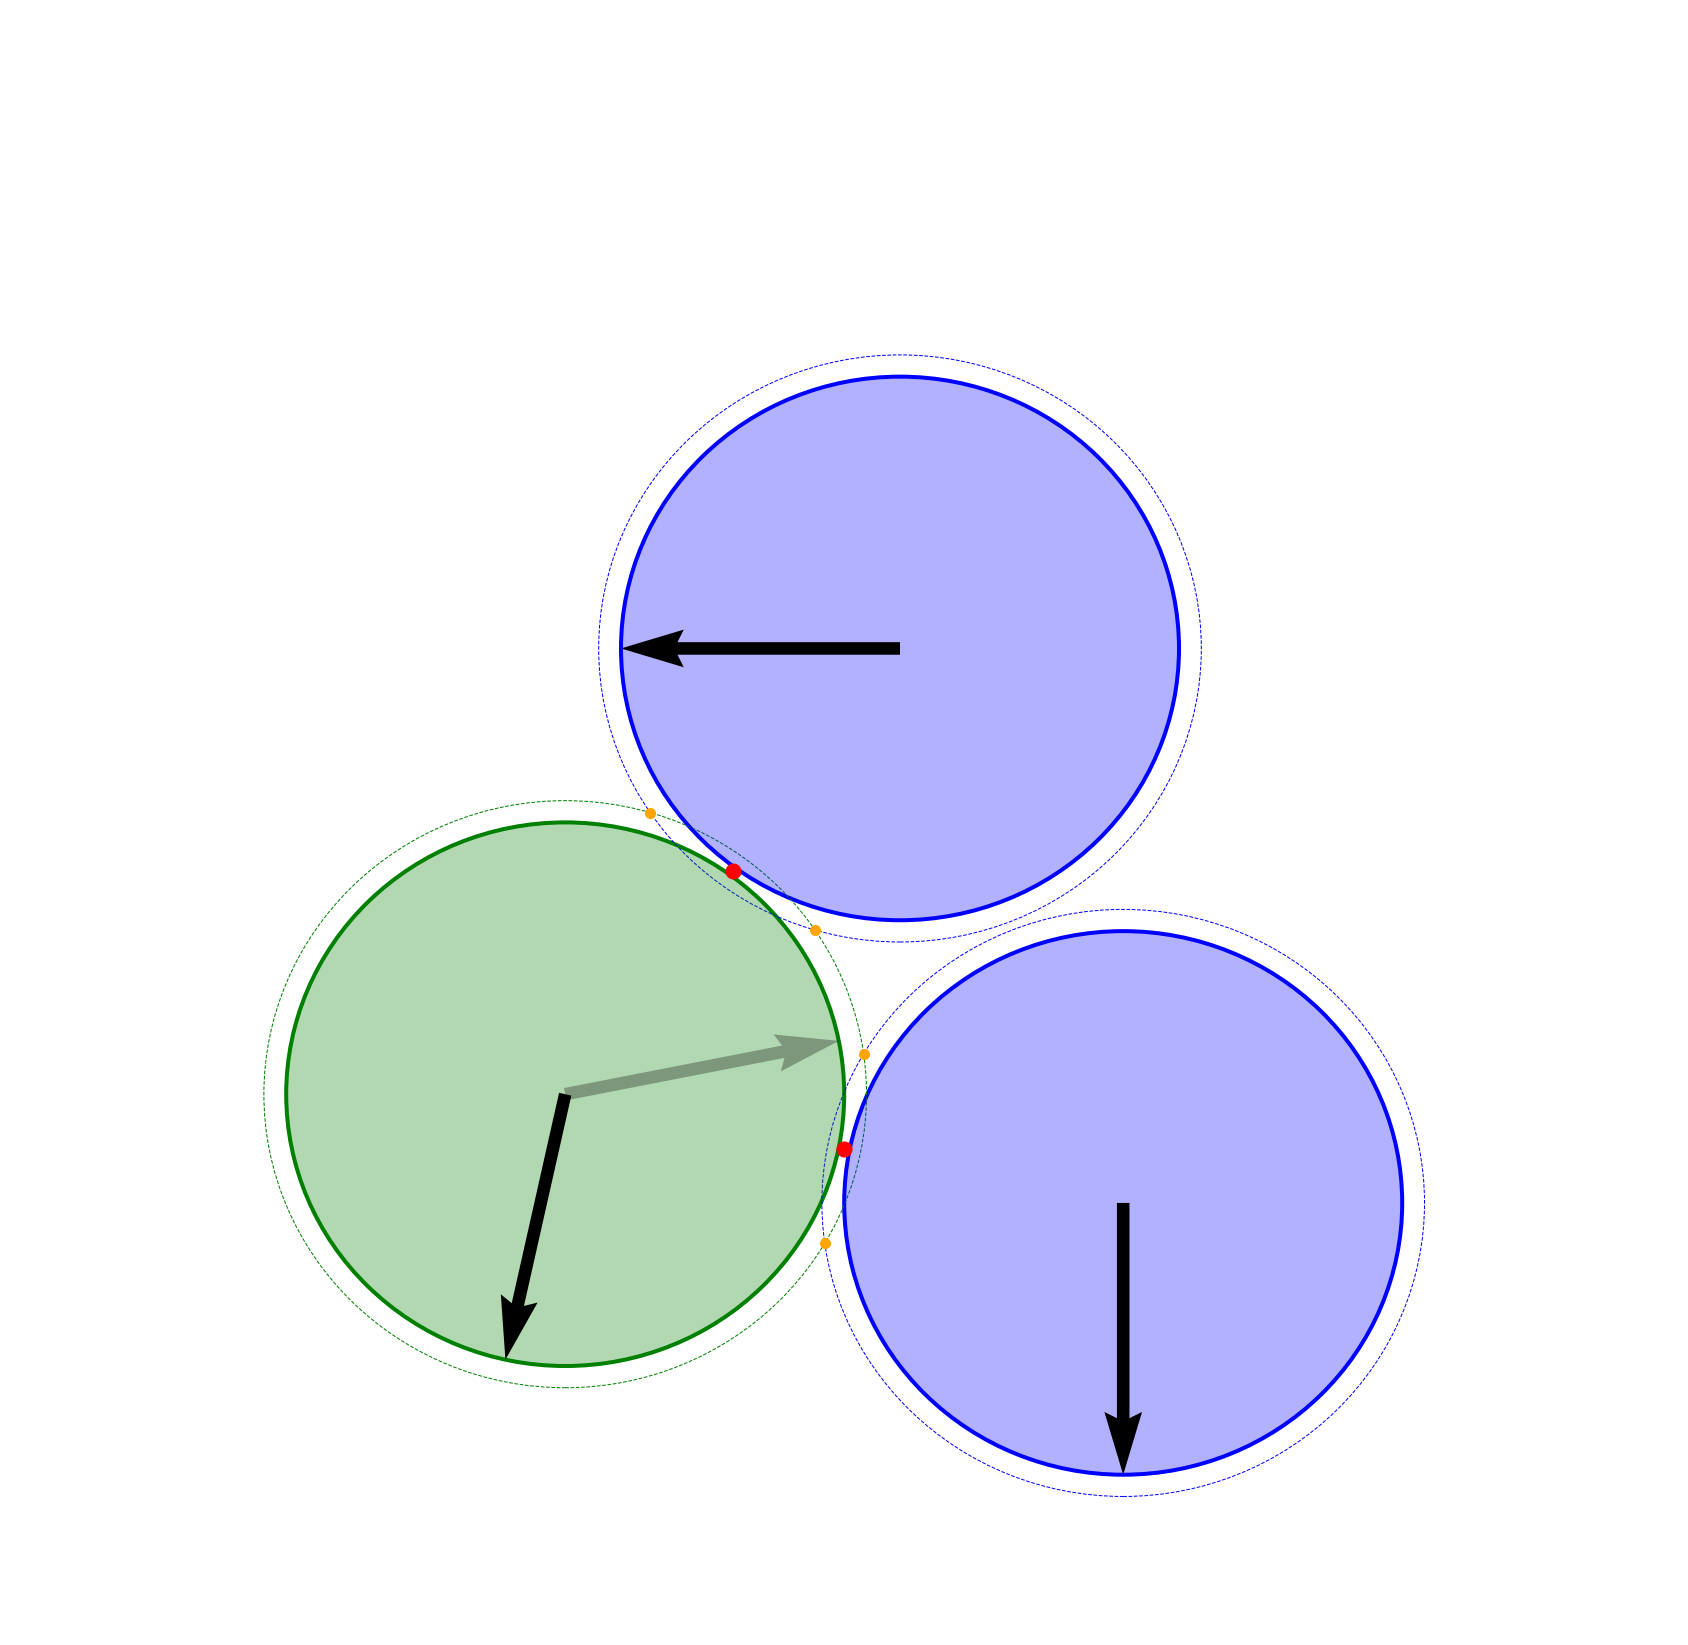

In [166]:
# intersection circles
x0, y0 = 0, 0
r0 = 0.25
x1, y1 = 0.5, -0.1
r1 = 0.25
x2, y2 = 0.3, 0.41
r2 = 0.25



circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4)
circle3 = plt.Circle((x2, y2), r2, color='b', fill=False, linewidth = 4)
circle4 = plt.Circle((x0, y0), r0, color='g', fill=True, linewidth = 1, alpha = 0.3)
circle5 = plt.Circle((x1, y1), r1, color='b', fill=True, linewidth = 1, alpha = 0.3)
circle6 = plt.Circle((x2, y2), r2, color='b', fill=True, linewidth = 1, alpha = 0.3)

circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')
circle33 = plt.Circle((x2, y2), r2+0.02, color='b', fill=False, linestyle='--')



fig, ax = plt.subplots() 
ax.set_xlim((-0.5, 1))
ax.set_ylim((-0.5, 1))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle11)
ax.add_artist(circle22)
ax.add_artist(circle33)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)


intersections = get_intersections(x0, y0, r0+0.02, x1, y1, r1+0.02, np.linalg.norm([x1,y1]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)
    plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
    
intersections = get_intersections(x0, y0, r0+0.02, x2, y2, r1+0.02, np.linalg.norm([x2,y2]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)
    plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)

v2 = [1, 0.2]
v2 /= np.linalg.norm(v2)  
v1 = [-0.3,-1]
v3 = [-1,0]

pos_other = [x1, y1]
pos_new = avoid_col_mult([pos_other, [x2,y2]], v2, [v1, v3], [0,1])
#pos_new = avoid_col(pos_other, v2)/0.06
pos_new /= np.linalg.norm(pos_new)
#pos_new = [0.02286064, 0.99973866]
print(pos_new)



plt.quiver(x1,y1,0,-1, angles='xy', scale_units='xy', scale=4)
plt.quiver(x2,y2,v3[0],v3[1], angles='xy', scale_units='xy', scale=4)
plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4, alpha=0.3)
plt.quiver(x0,y0,pos_new[0],pos_new[1], angles='xy', scale_units='xy', scale=4)
#plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
plt.axis('off')
#plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(30,30)
plt.savefig("circles2.png")

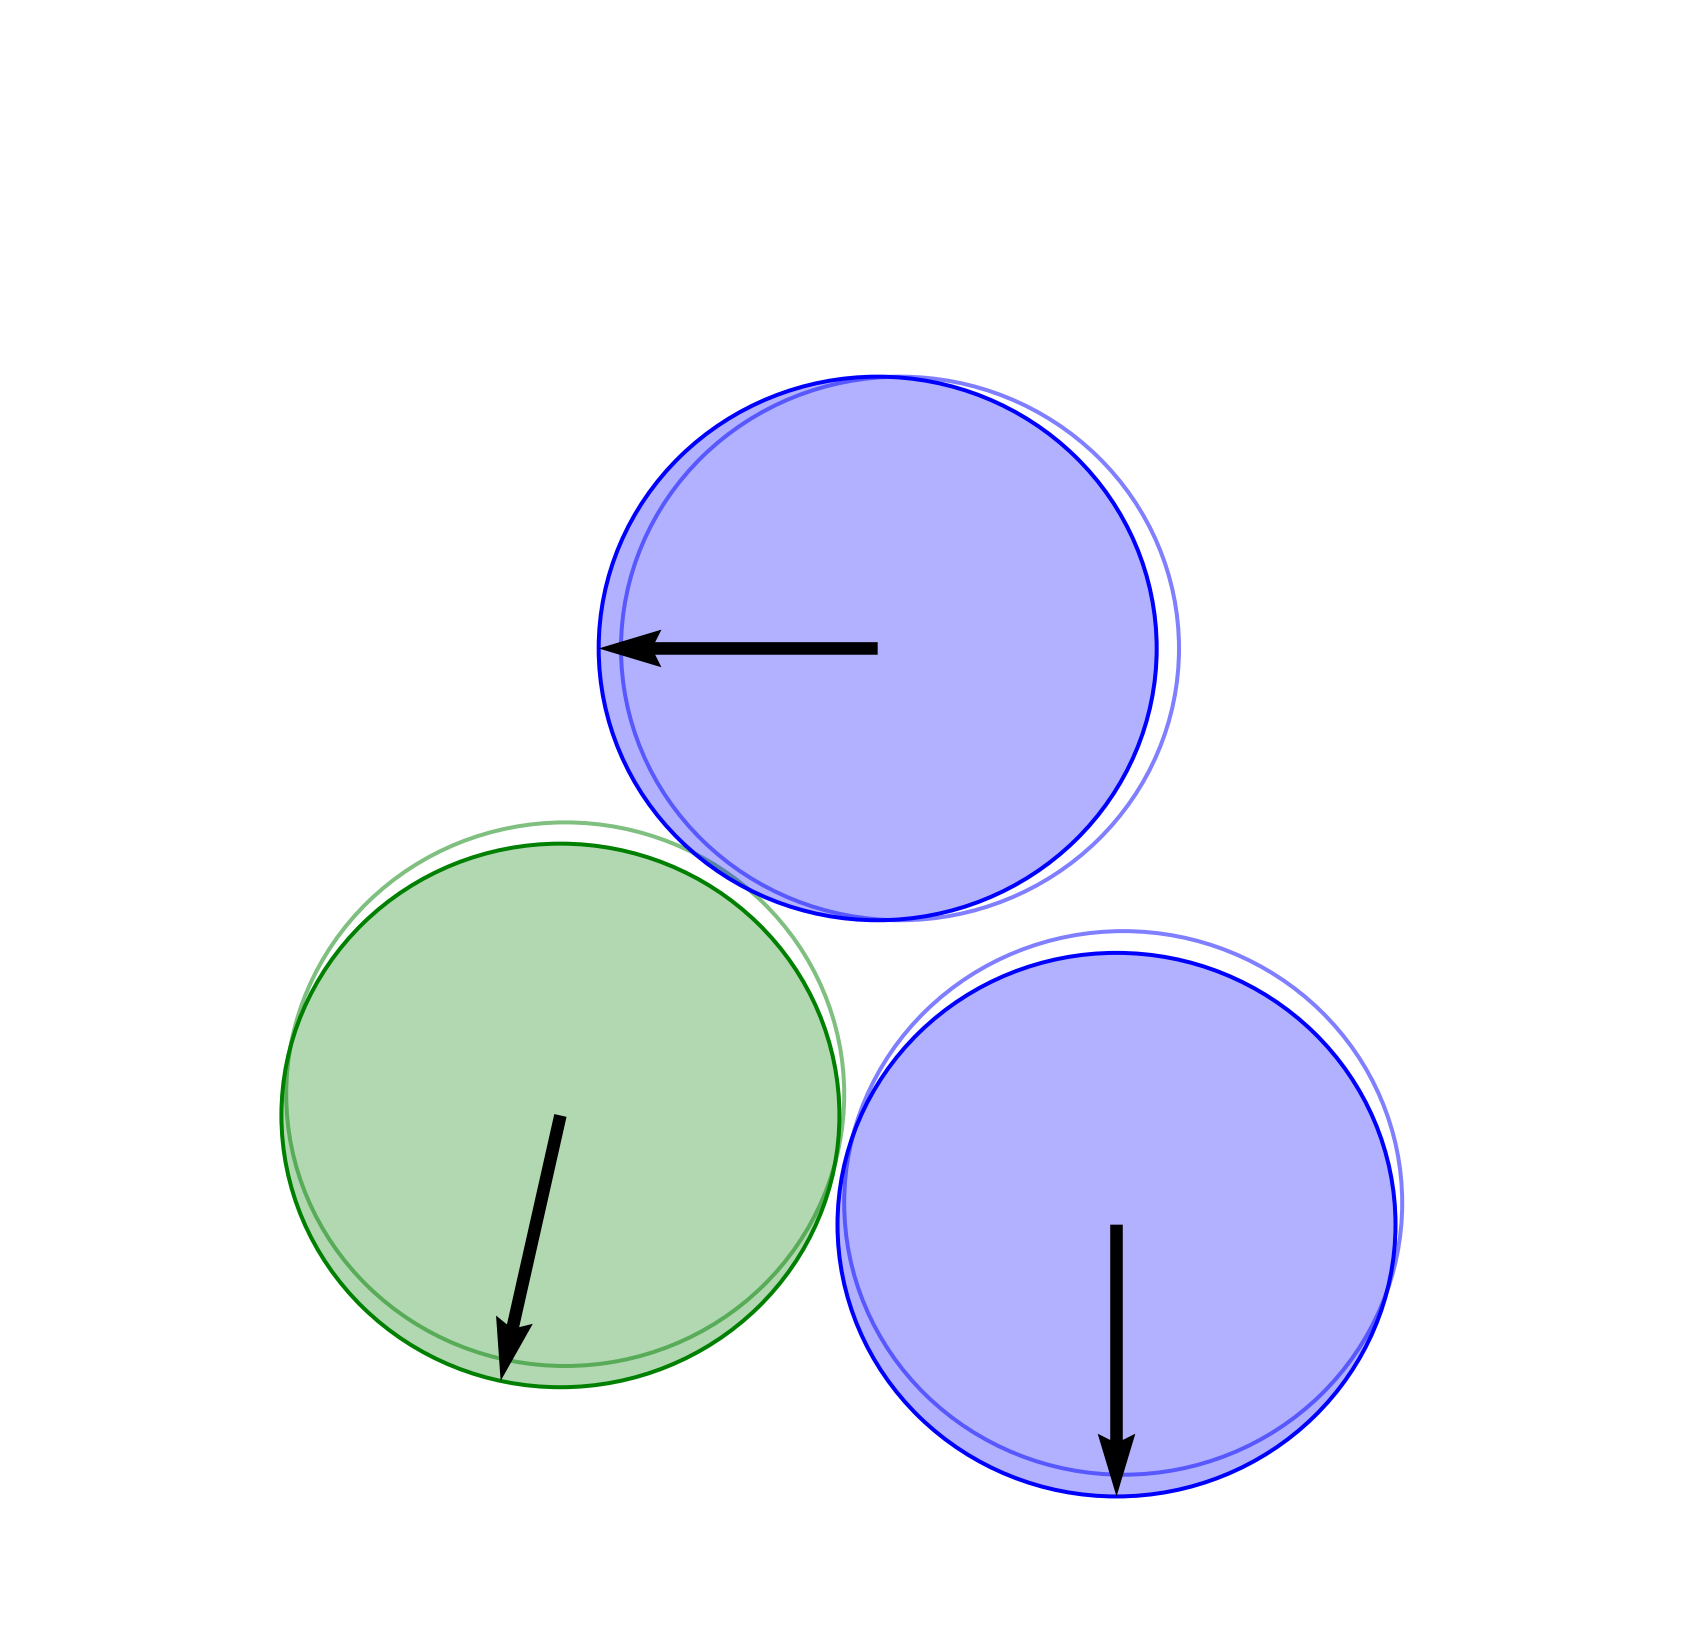

In [167]:
# intersection circles
x0, y0 = 0, 0
r0 = 0.25
x1, y1 = 0.5, -0.1
r1 = 0.25
x2, y2 = 0.3, 0.41
r2 = 0.25



circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4, alpha = 0.5)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4, alpha = 0.5)
circle3 = plt.Circle((x2, y2), r2, color='b', fill=False, linewidth = 4, alpha = 0.5)




fig, ax = plt.subplots() 
ax.set_xlim((-0.5, 1))
ax.set_ylim((-0.5, 1))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)



x0 += pos_new[0]*0.02
y0 += pos_new[1]*0.02


x1 += v1[0]*0.02
y1 += v1[1]*0.02

x2 += v3[0]*0.02
y2 += v3[1]*0.02


circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4)
circle3 = plt.Circle((x2, y2), r2, color='b', fill=False, linewidth = 4)
circle4 = plt.Circle((x0, y0), r0, color='g', fill=True, linewidth = 1, alpha = 0.3)
circle5 = plt.Circle((x1, y1), r1, color='b', fill=True, linewidth = 1, alpha = 0.3)
circle6 = plt.Circle((x2, y2), r2, color='b', fill=True, linewidth = 1, alpha = 0.3)




ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)




plt.quiver(x1,y1,0,-1, angles='xy', scale_units='xy', scale=4)
plt.quiver(x2,y2,v3[0],v3[1], angles='xy', scale_units='xy', scale=4)
#plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4, alpha=0.3)
plt.quiver(x0,y0,pos_new[0],pos_new[1], angles='xy', scale_units='xy', scale=4)
#plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
plt.axis('off')
#plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(30,30)

plt.savefig("circles2-2.png")

[-0.21429685 -0.97676858]


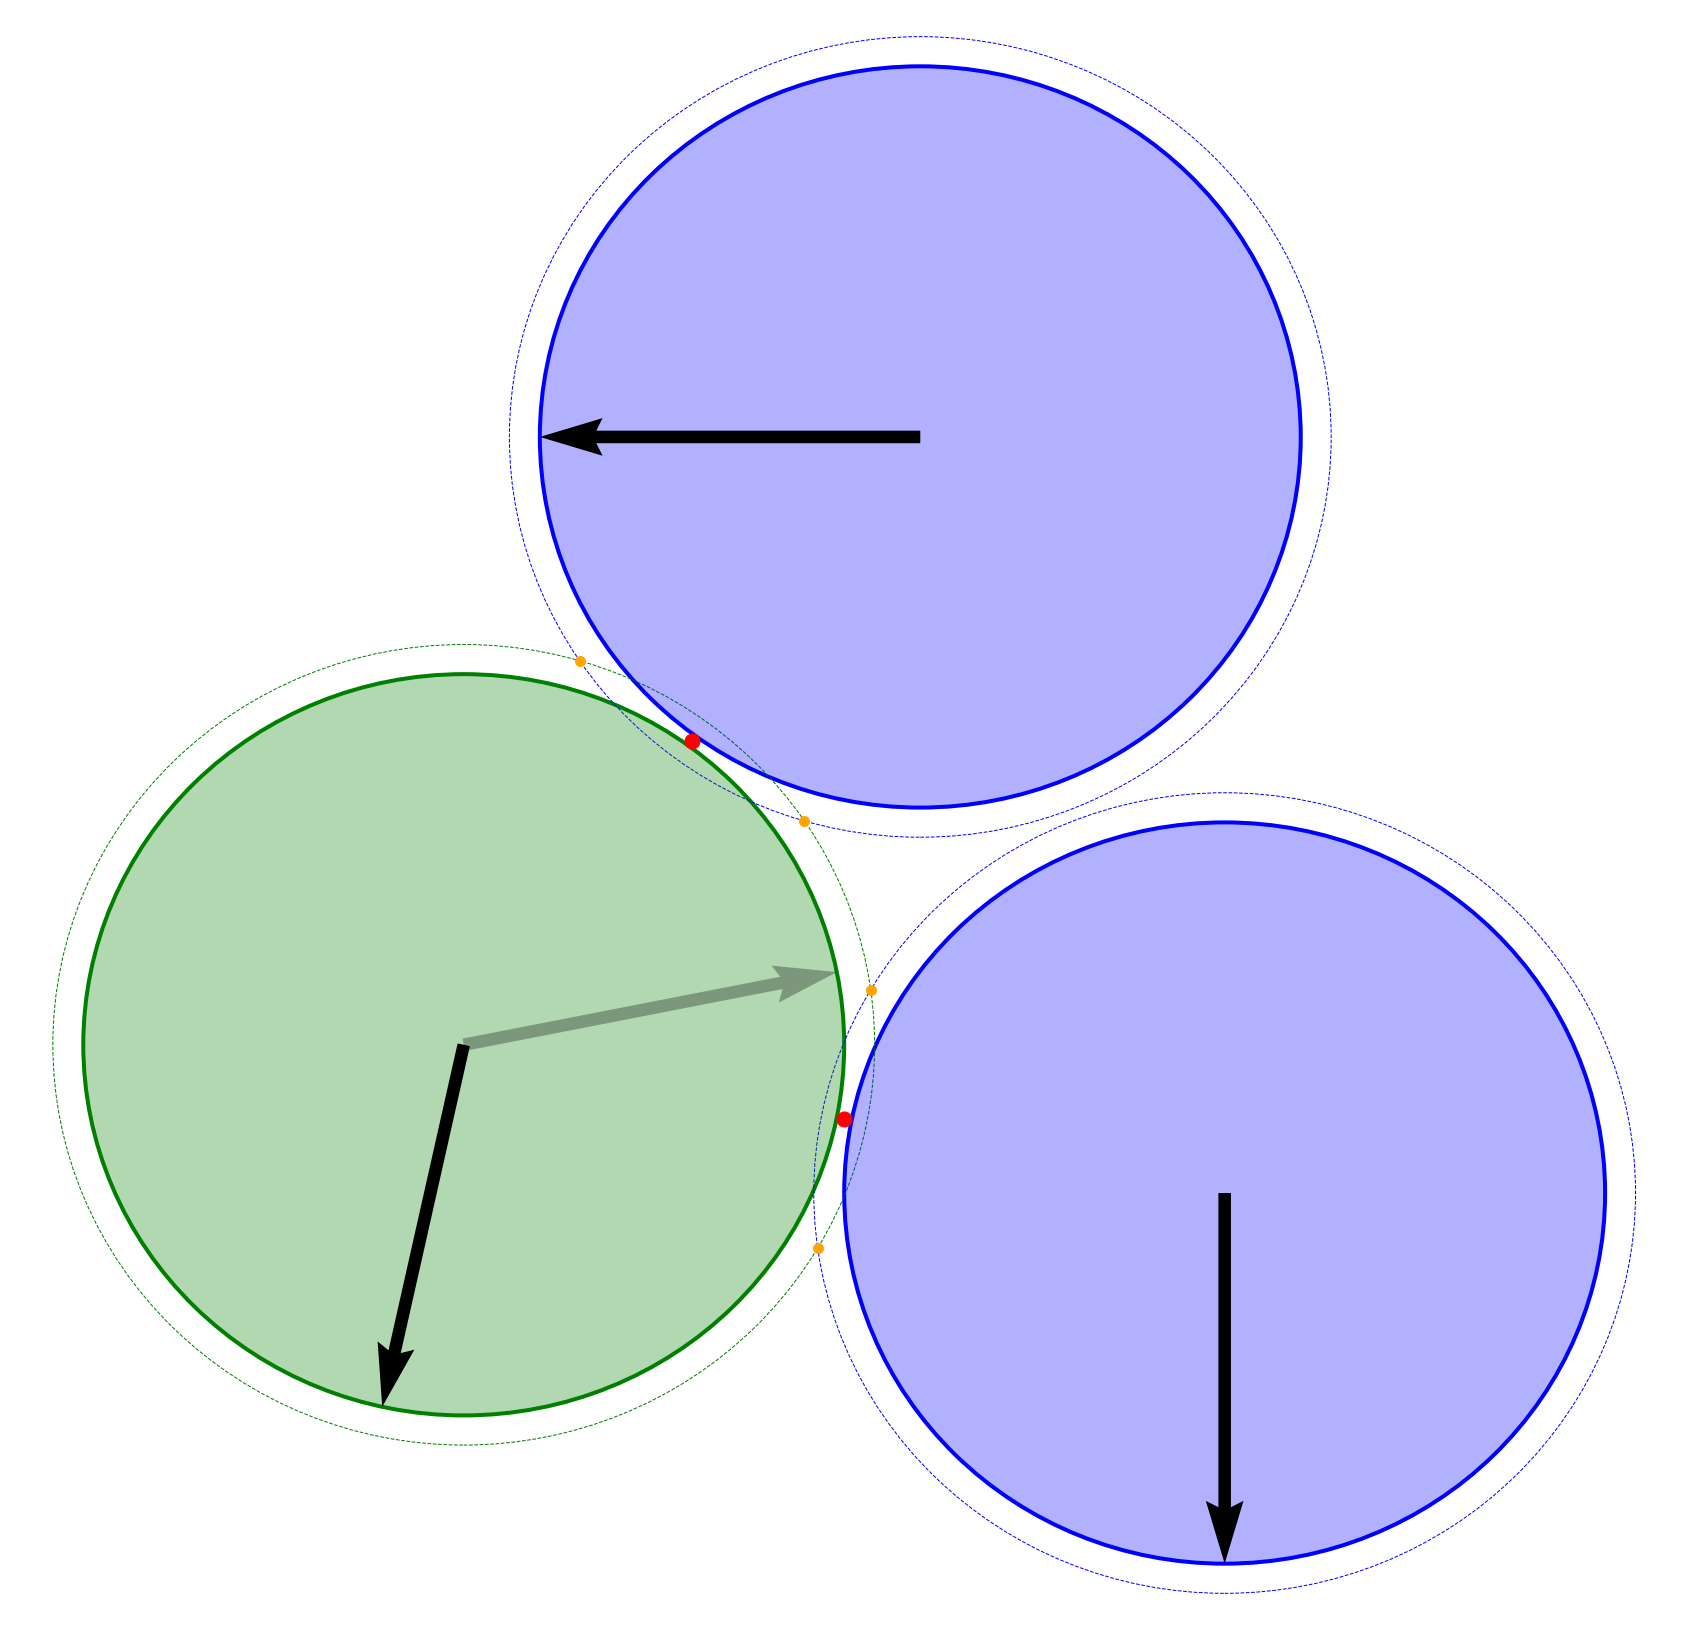

In [201]:
# intersection circles
x0, y0 = 0, 0
r0 = 0.25
x1, y1 = 0.5, -0.1
r1 = 0.25
x2, y2 = 0.3, 0.41
r2 = 0.25



circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4)
circle3 = plt.Circle((x2, y2), r2, color='b', fill=False, linewidth = 4)
circle4 = plt.Circle((x0, y0), r0, color='g', fill=True, linewidth = 1, alpha = 0.3)
circle5 = plt.Circle((x1, y1), r1, color='b', fill=True, linewidth = 1, alpha = 0.3)
circle6 = plt.Circle((x2, y2), r2, color='b', fill=True, linewidth = 1, alpha = 0.3)

circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')
circle33 = plt.Circle((x2, y2), r2+0.02, color='b', fill=False, linestyle='--')



fig, ax = plt.subplots() 
ax.set_xlim((-0.3, 0.8))
ax.set_ylim((-0.4, 0.7))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle11)
ax.add_artist(circle22)
ax.add_artist(circle33)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)


intersections = get_intersections(x0, y0, r0+0.02, x1, y1, r1+0.02, np.linalg.norm([x1,y1]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)
    plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
    
intersections = get_intersections(x0, y0, r0+0.02, x2, y2, r1+0.02, np.linalg.norm([x2,y2]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)
    plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)

v2 = [1, 0.2]
v2 /= np.linalg.norm(v2)  
v1 = [-0.3,-1]
v3 = [-1,0]

pos_other = [x1, y1]
pos_new = avoid_col_mult([pos_other, [x2,y2]], v2, [v1, v3], [0,1])
#pos_new = avoid_col(pos_other, v2)/0.06
pos_new /= np.linalg.norm(pos_new)
#pos_new = [0.02286064, 0.99973866]
print(pos_new)



plt.quiver(x1,y1,0,-1, angles='xy', scale_units='xy', scale=4)
plt.quiver(x2,y2,v3[0],v3[1], angles='xy', scale_units='xy', scale=4)
plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4, alpha=0.3)
plt.quiver(x0,y0,pos_new[0],pos_new[1], angles='xy', scale_units='xy', scale=4)
#plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
plt.axis('off')
#plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(30,30)
plt.savefig("circles_mult.pdf")

[-0.21429685 -0.97676858]


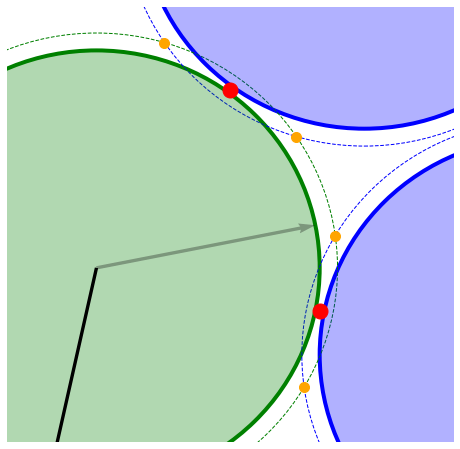

In [207]:
# intersection circles
x0, y0 = 0, 0
r0 = 0.25
x1, y1 = 0.5, -0.1
r1 = 0.25
x2, y2 = 0.3, 0.41
r2 = 0.25



circle1 = plt.Circle((x0, y0), r0, color='g', fill=False, linewidth = 4)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False, linewidth = 4)
circle3 = plt.Circle((x2, y2), r2, color='b', fill=False, linewidth = 4)
circle4 = plt.Circle((x0, y0), r0, color='g', fill=True, linewidth = 1, alpha = 0.3)
circle5 = plt.Circle((x1, y1), r1, color='b', fill=True, linewidth = 1, alpha = 0.3)
circle6 = plt.Circle((x2, y2), r2, color='b', fill=True, linewidth = 1, alpha = 0.3)

circle11 = plt.Circle((x0, y0), r0+0.02, color='g', fill=False, linestyle='--')
circle22 = plt.Circle((x1, y1), r1+0.02, color='b', fill=False, linestyle='--')
circle33 = plt.Circle((x2, y2), r2+0.02, color='b', fill=False, linestyle='--')



fig, ax = plt.subplots() 
ax.set_xlim((-0.1, 0.4))
ax.set_ylim((-0.2, 0.3))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle11)
ax.add_artist(circle22)
ax.add_artist(circle33)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)


intersections = get_intersections(x0, y0, r0+0.02, x1, y1, r1+0.02, np.linalg.norm([x1,y1]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)
    plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
    
intersections = get_intersections(x0, y0, r0+0.02, x2, y2, r1+0.02, np.linalg.norm([x2,y2]))
col_pos[0] = (intersections[0]+intersections[2])/2
col_pos[1] = (intersections[1]+intersections[3])/2
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='orange', markersize=20)
    plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)

v2 = [1, 0.2]
v2 /= np.linalg.norm(v2)  
v1 = [-0.3,-1]
v3 = [-1,0]

pos_other = [x1, y1]
pos_new = avoid_col_mult([pos_other, [x2,y2]], v2, [v1, v3], [0,1])
#pos_new = avoid_col(pos_other, v2)/0.06
pos_new /= np.linalg.norm(pos_new)
#pos_new = [0.02286064, 0.99973866]
print(pos_new)



plt.quiver(x1,y1,0,-1, angles='xy', scale_units='xy', scale=4)
plt.quiver(x2,y2,v3[0],v3[1], angles='xy', scale_units='xy', scale=4)
plt.quiver(x0,y0,v2[0],v2[1], angles='xy', scale_units='xy', scale=4, alpha=0.3)
plt.quiver(x0,y0,pos_new[0],pos_new[1], angles='xy', scale_units='xy', scale=4)
#plt.plot(col_pos[0], col_pos[1], '.', color='r', markersize=30)
plt.axis('off')
#plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(8,8)
plt.savefig("circles_mult2.pdf")